In [1]:
import pandas as pd 
import pydeck as pdk
import folium
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import contextily as ctx


In [2]:
df = pd.read_csv("data/nyc_week_agg_2024_08012024_09012024.csv")

In [3]:
df.head()
# print(df.dtypes)

,Year,Month,Day of Week,Hour of Day,Timestamp,Origin Station Complex ID,Origin Station Complex Name,Origin Latitude,Origin Longitude,Destination Station Complex ID,Destination Station Complex Name,Destination Latitude,Destination Longitude,Estimated Average Ridership,Origin Point,Destination Point
0,2024,1,Monday,0,01/08/2024 12:00:00 AM,55,"Brighton Beach (B,Q)",40.577621,-73.961376,609,"Bryant Pk (B,D,F,M)/5 Av (7)",40.754022,-73.983266,0.2666,POINT (-73.961376 40.577621),POINT (-73.983266 40.754022)
1,2024,1,Monday,0,01/08/2024 12:00:00 AM,259,"Kew Gardens-Union Tpke (E,F)",40.714441,-73.831008,611,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",40.755746,-73.987581,1.7108,POINT (-73.831008 40.714441),POINT (-73.987581 40.755746)
2,2024,1,Monday,0,01/08/2024 12:00:00 AM,340,"Grand Army Plaza (2,3)",40.675235,-73.971046,277,"7 Av (E,B,D)",40.762862,-73.981637,1.2126,POINT (-73.971046 40.675235),POINT (-73.981637 40.762862)
3,2024,1,Monday,0,01/08/2024 12:00:00 AM,383,183 St (4),40.858407,-73.903879,602,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",40.735066,-73.990416,1.0974,POINT (-73.903879 40.858407),POINT (-73.990416 40.735066)
4,2024,1,Monday,0,01/08/2024 12:00:00 AM,602,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",40.735066,-73.990416,167,"W 4 St-Wash Sq (A,C,E,B,D,F,M)",40.732338,-74.000495,1.6580,POINT (-73.990416 40.735066),POINT (-74.000495 40.732338)


In [4]:
a = list(df.columns)
remove = ['Year', 'Month', 'Day of Week', 'Timestamp', 'Origin Point', 'Destination Point', 'Origin Station Complex Name', "Destination Station Complex Name", 'Estimated Average Ridership']
for b in remove: 
    a.remove(b)
print(a)

df_agg = (df.groupby(a, as_index = False))['Estimated Average Ridership'].sum()
print(len(df_agg))
df_agg.head(n=30)

['Hour of Day', 'Origin Station Complex ID', 'Origin Latitude', 'Origin Longitude', 'Destination Station Complex ID', 'Destination Latitude', 'Destination Longitude']
1430318


,Hour of Day,Origin Station Complex ID,Origin Latitude,Origin Longitude,Destination Station Complex ID,Destination Latitude,Destination Longitude,Estimated Average Ridership
0,0,1,40.775036,-73.912034,2,40.770258,-73.917843,0.7340
1,0,1,40.775036,-73.912034,3,40.766779,-73.921479,2.9854
2,0,1,40.775036,-73.912034,4,40.761820,-73.925508,7.4394
3,0,1,40.775036,-73.912034,5,40.756804,-73.929575,2.0324
4,0,1,40.775036,-73.912034,6,40.752882,-73.932755,0.5412
5,0,1,40.775036,-73.912034,8,40.764811,-73.973347,0.4878
6,0,1,40.775036,-73.912034,9,40.764664,-73.980658,0.2416
7,0,1,40.775036,-73.912034,10,40.759901,-73.984139,0.7790
8,0,1,40.775036,-73.912034,13,40.745494,-73.988691,0.2462
9,0,1,40.775036,-73.912034,20,40.713282,-74.006978,0.2538


In [5]:
# layer = pdk.Layer(
#     "ArcLayer",
#     data=df_agg,
#     get_source_position=["Origin Latitude", "Origin Longitude"],
#     get_target_position=["Destination Latitude", "Destination Longitude"],
#     get_source_color=[0, 128, 255, 160],
#     get_target_color=[255, 0, 0, 160],
#     get_width="Estimated Average Ridership",
#     pickable=True,
# )
# print("hello")

# view_state = pdk.ViewState(
#     latitude=df_agg['Origin Latitude'].mean(),
#     longitude=df_agg['Origin Latitude'].mean(),
#     zoom=11,
#     pitch=40,
# )
# print("hello2")

# # pdk.Deck(layers=[layer], initial_view_state=view_state).to_html("rider_flows.html")
# pdk.Deck(layers=[layer], initial_view_state=view_state).show()

# m = folium.Map(location=[df_agg['Origin Latitude'].mean(), df_agg['Origin Longitude'].mean()], zoom_start=12)

# for _, row in df_agg.iterrows():
#     folium.PolyLine(
#         [(row['Origin Latitude'], row['Origin Longitude']), (row['Destination Latitude'], row['Destination Longitude'])],
#         color='blue',
#         opacity=0.4,
#         weight=max(1, row['Estimated Average Ridership'] / 100),  # scale thickness
#     ).add_to(m)

# m.save("rider_flows.html")
def make_line(row):
    return LineString([
        (row['Origin Longitude'], row['Origin Latitude']),
        (row['Destination Longitude'], row['Destination Latitude'])
    ])

gdf = gpd.GeoDataFrame(df_agg, geometry=df_agg.apply(make_line, axis=1), crs="EPSG:4326")


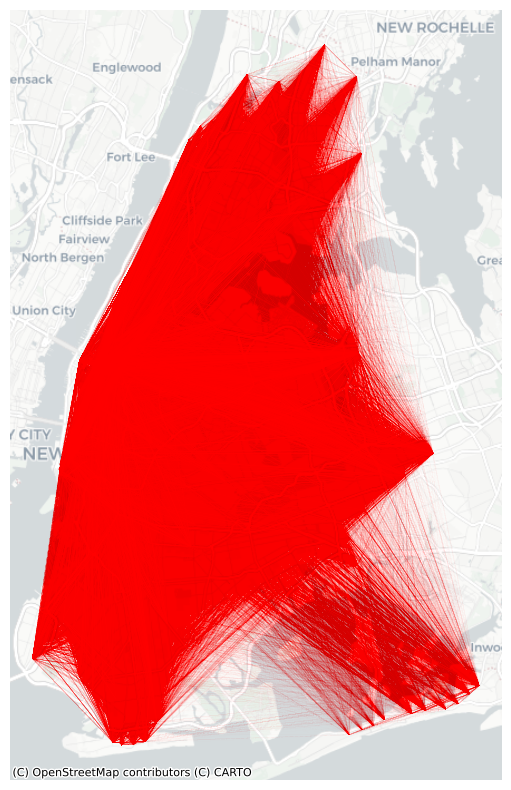

In [6]:
# fig, ax = plt.subplots(figsize=(10, 10))
# gdf.plot(ax=ax, linewidth=gdf['Estimated Average Ridership'] / gdf['Estimated Average Ridership'].max() * 5, color='blue', alpha=0.5)

# ax.set_title("Public Transport Flows")
# ax.set_axis_off()
# plt.show()


gdf_merc = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_merc.plot(ax=ax, linewidth=gdf_merc['Estimated Average Ridership'] / gdf_merc['Estimated Average Ridership'].max() * 5, color='red', alpha=0.6)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.show()